In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import rl_equation_solver
from rl_equation_solver.environment.algebraic import Env
from rl_equation_solver.agent.dqn import Agent as AgentDQN
from rl_equation_solver.agent.gcn import Agent as AgentGCN
from rl_equation_solver.agent.lstm import Agent as AgentLSTM
from rl_equation_solver.utilities import utilities
from rl_equation_solver.utilities.utilities import GraphEmbedding
import networkx as nx
import numpy as np
from torch_geometric.utils.convert import from_networkx
import matplotlib.pyplot as plt
from rex import init_logger

In [3]:
init_logger(__name__, log_level='DEBUG')
init_logger('rl_equation_solver', log_level="DEBUG")

<Logger rl_equation_solver (DEBUG)>

In [52]:
def moving_avg(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def make_plot(agent, round, start=0):
    fig, ax = plt.subplots(1, 3, figsize=(10, 10))
    avg_complex = []
    avg_reward = []
    avg_loss = []
    for episode in list(agent.history.keys())[start:]:
        avg_complex.append(np.mean(agent.history[episode]['complexity']))
        avg_loss.append(np.nanmean(agent.history[episode]['loss']))
        avg_reward.append(np.mean(agent.history[episode]['reward']))
    
    y = moving_avg(avg_complex, 1)
    x = np.arange(len(y))
    a, b = np.polyfit(x, y, 1)
    ax[0].scatter(x, y)
    ax[0].plot(x, a*x+b, color='red')

    y = moving_avg(avg_loss, 1)
    x = np.arange(len(y))
    a, b = np.polyfit(x, y, 1)
    ax[1].scatter(x, y)
    ax[1].plot(x, a*x+b, color='red')
    
    y = moving_avg(avg_reward, 1)
    x = np.arange(len(y))
    a, b = np.polyfit(x, y, 1)
    ax[2].scatter(x, y)
    ax[2].plot(x, a*x+b, color='red')
    
    ax[0].set_title('Complexity')
    ax[1].set_title('Loss')
    ax[2].set_title("Reward")
    plt.annotate('Episode', (0.4, 0.01), xycoords='figure fraction')
    fig.suptitle(f'Round {round}')
    fig.savefig(f'./figs/round_{round}.png', dpi=300)

In [294]:
dqn_env = Env(order=3)
agent_dqn = AgentDQN(dqn_env, device='cuda:0')

INFO - 2023-04-11 15:45:29,311 [dqn.py:35] : Initialized Agent with device cuda:0


INFO - 2023-04-11 15:45:12,404 [base.py:209] : episode 0, {'complexity': 17, 'loss': nan, 'reward': '-4.000e+00', 'state': a0 - a1}
INFO - 2023-04-11 15:45:12,472 [base.py:209] : episode 0, {'complexity': 23, 'loss': nan, 'reward': '-6.000e+00', 'state': (a0 - a1)/a1}
INFO - 2023-04-11 15:45:12,553 [base.py:209] : episode 0, {'complexity': 29, 'loss': nan, 'reward': '-6.000e+00', 'state': (a0 - a1)/a1**2}
INFO - 2023-04-11 15:45:12,646 [base.py:209] : episode 0, {'complexity': 31, 'loss': nan, 'reward': '-2.000e+00', 'state': (a0 + a1**2 - a1)/a1**2}
INFO - 2023-04-11 15:45:12,725 [base.py:209] : episode 0, {'complexity': 31, 'loss': nan, 'reward': '0.000e+00', 'state': (a0 + a1**2 - a1)/a1**2}
INFO - 2023-04-11 15:45:12,828 [base.py:209] : episode 0, {'complexity': 39, 'loss': nan, 'reward': '-8.000e+00', 'state': a0/a1**2 - a1 + 1 - 1/a1}
INFO - 2023-04-11 15:45:12,932 [base.py:209] : episode 0, {'complexity': 39, 'loss': nan, 'reward': '0.000e+00', 'state': a0/a1**2 - a1 + 1 - 1/a1}

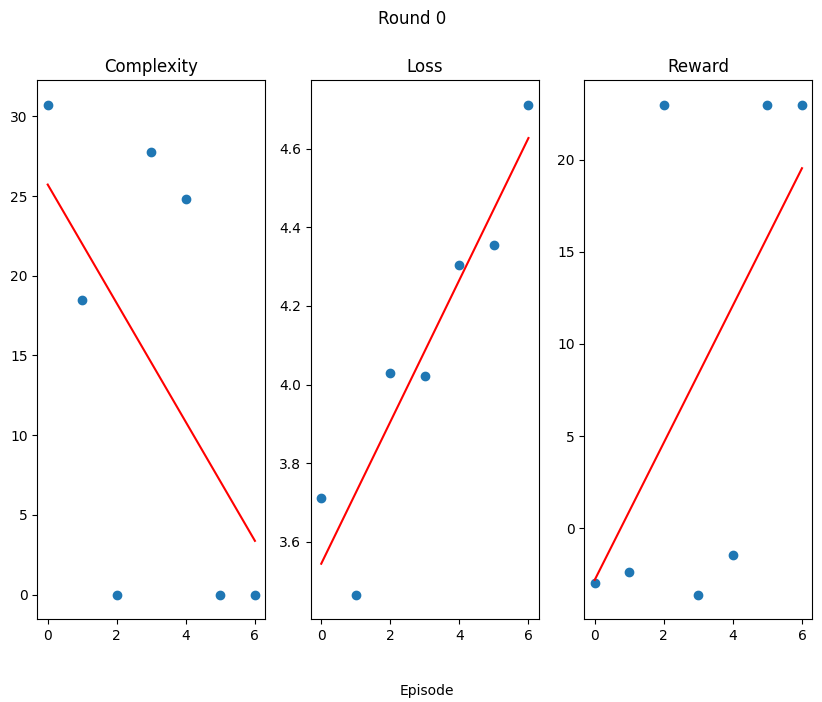

In [293]:
for i in range(1):
    agent_dqn.train(num_episodes=10)
    make_plot(agent_dqn, round=i, start=3)    

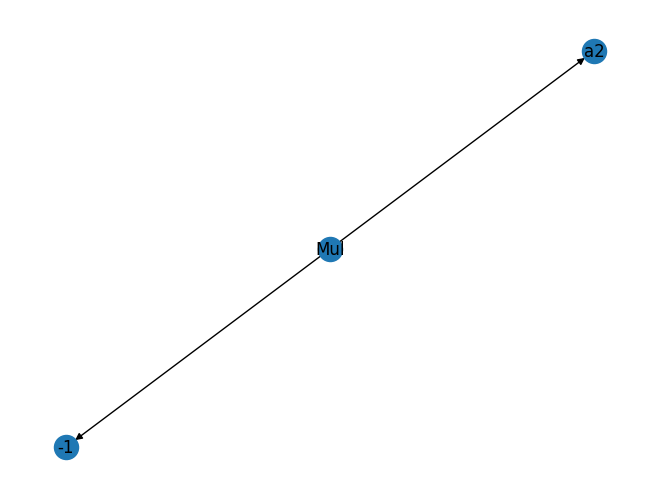

In [295]:
nx.draw(dqn_env.state_graph, labels=dqn_env.node_labels)

In [296]:
gcn_env = Env(order=2)
agent_gcn = AgentGCN(gcn_env, device='cuda:0')

INFO - 2023-04-11 15:45:52,258 [gcn.py:35] : Initialized Agent with device cuda:0


INFO - 2023-04-11 15:46:11,841 [base.py:209] : episode 10, {'complexity': 17, 'loss': 4.262397766113281, 'reward': '-4.000e+00', 'state': (-a1)**a1}
INFO - 2023-04-11 15:46:11,947 [base.py:209] : episode 10, {'complexity': 19, 'loss': 4.274082183837891, 'reward': '-2.000e+00', 'state': (-a1)**a1 + 1}
INFO - 2023-04-11 15:46:12,045 [base.py:209] : episode 10, {'complexity': 17, 'loss': 3.5655417442321777, 'reward': '2.000e+00', 'state': (-a1)**a1}
INFO - 2023-04-11 15:46:12,157 [base.py:209] : episode 10, {'complexity': 21, 'loss': 3.381598472595215, 'reward': '-4.000e+00', 'state': ((-a1)**a1)**a1}
INFO - 2023-04-11 15:46:12,256 [base.py:209] : episode 10, {'complexity': 21, 'loss': 4.101037979125977, 'reward': '0.000e+00', 'state': ((-a1)**a1)**a1}
INFO - 2023-04-11 15:46:12,373 [base.py:209] : episode 10, {'complexity': 25, 'loss': 2.9552741050720215, 'reward': '-4.000e+00', 'state': (((-a1)**a1)**a1)**a1}
INFO - 2023-04-11 15:46:12,486 [base.py:209] : episode 10, {'complexity': 31, 

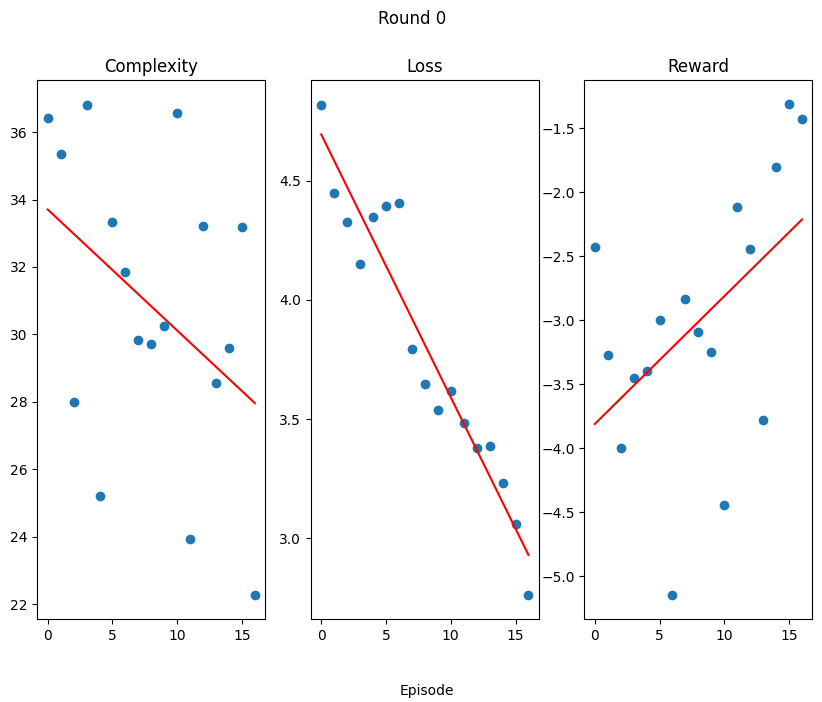

In [298]:
for i in range(1):
    agent_gcn.train(num_episodes=10)
    make_plot(agent_gcn, round=i, start=3)    

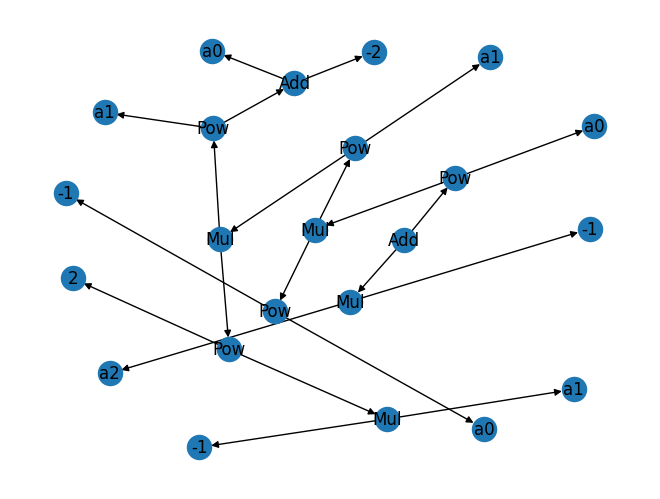

In [256]:
nx.draw(gcn_env.state_graph, labels=gcn_env.node_labels)

In [303]:
lstm_env = Env(order=2)
agent_lstm = AgentLSTM(lstm_env, device='cuda:0')

INFO - 2023-04-11 15:49:23,045 [lstm.py:36] : Initialized Agent with device cuda:0


INFO - 2023-04-11 15:50:25,522 [base.py:211] : ("episode 10, {'complexity': 13, 'loss': 17.09650421142578, 'reward': "
 "'0.000e+00', 'state': 1 - a1, 'steps_done': 266}")
INFO - 2023-04-11 15:50:25,718 [base.py:211] : ("episode 10, {'complexity': 17, 'loss': 28.86233901977539, 'reward': "
 "'-4.000e+00', 'state': 2 - a1, 'steps_done': 267}")
INFO - 2023-04-11 15:50:25,927 [base.py:211] : ("episode 10, {'complexity': 17, 'loss': 10.570758819580078, 'reward': "
 "'0.000e+00', 'state': 3 - a1, 'steps_done': 268}")
INFO - 2023-04-11 15:50:26,121 [base.py:211] : ("episode 10, {'complexity': 17, 'loss': 13.72403335571289, 'reward': "
 "'0.000e+00', 'state': 4 - a1, 'steps_done': 269}")
INFO - 2023-04-11 15:50:26,321 [base.py:211] : ("episode 10, {'complexity': 17, 'loss': 27.720027923583984, 'reward': "
 "'0.000e+00', 'state': 5 - a1, 'steps_done': 270}")
INFO - 2023-04-11 15:50:26,520 [base.py:211] : ("episode 10, {'complexity': 17, 'loss': 16.70571517944336, 'reward': "
 "'0.000e+00', 'st

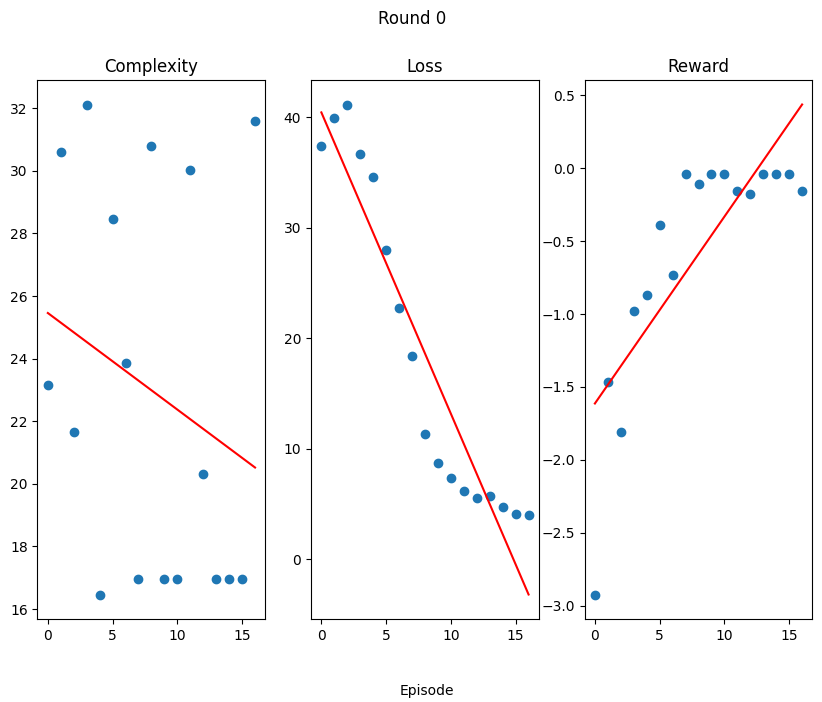

In [305]:
for i in range(1):
    agent_lstm.train(num_episodes=10)
    make_plot(agent_lstm, round=i, start=3)    

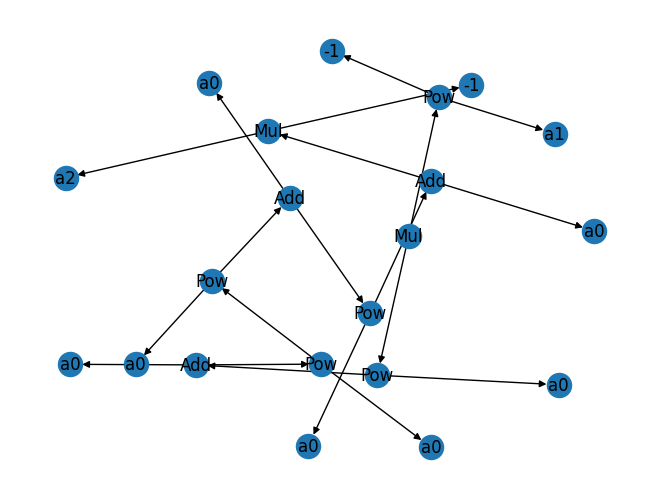

In [259]:
nx.draw(lstm_env.state_graph, labels=lstm_env.node_labels)